In [1]:
import pandas as pd

df = pd.read_csv('model_and_method_comparison.csv')
df2 = pd.read_csv('model_comparison_with_all_features.csv')

In [2]:
df.head(5)

,Model name,Feature Selection Method,No Features,Mean Score,Std Score
0,Random Forest,SelectKBest F-classif,1,4972.257028,190.702056
1,Random Forest,SelectKBest F-classif,2,4716.144578,298.283779
2,Random Forest,SelectKBest F-classif,3,4452.032129,280.093296
3,Random Forest,SelectKBest F-classif,4,4312.144578,294.136138
4,Random Forest,SelectKBest F-classif,5,4199.807229,366.994165


In [3]:
df = df.loc[df['Feature Selection Method'] != 'PCA', :]

In [4]:
df2

,Model name,Feature Selection Method,No Features,Mean Score,Std Score
0,Random Forest,NaN,492,5609.060241,289.325557
1,SVM,NaN,492,5100.016064,368.809937
2,XGBoost,NaN,492,6265.991968,325.061222
3,CatBoost,NaN,492,6546.377510,283.614972
4,LightGBM,NaN,492,6919.132530,188.859705


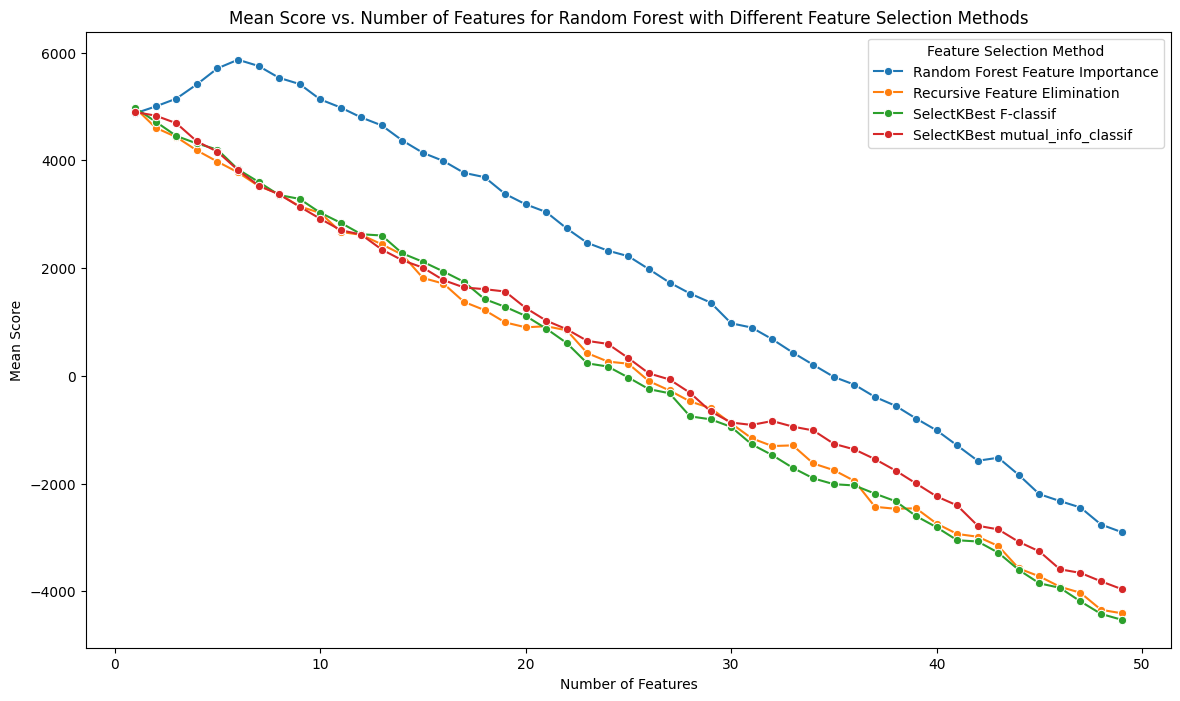

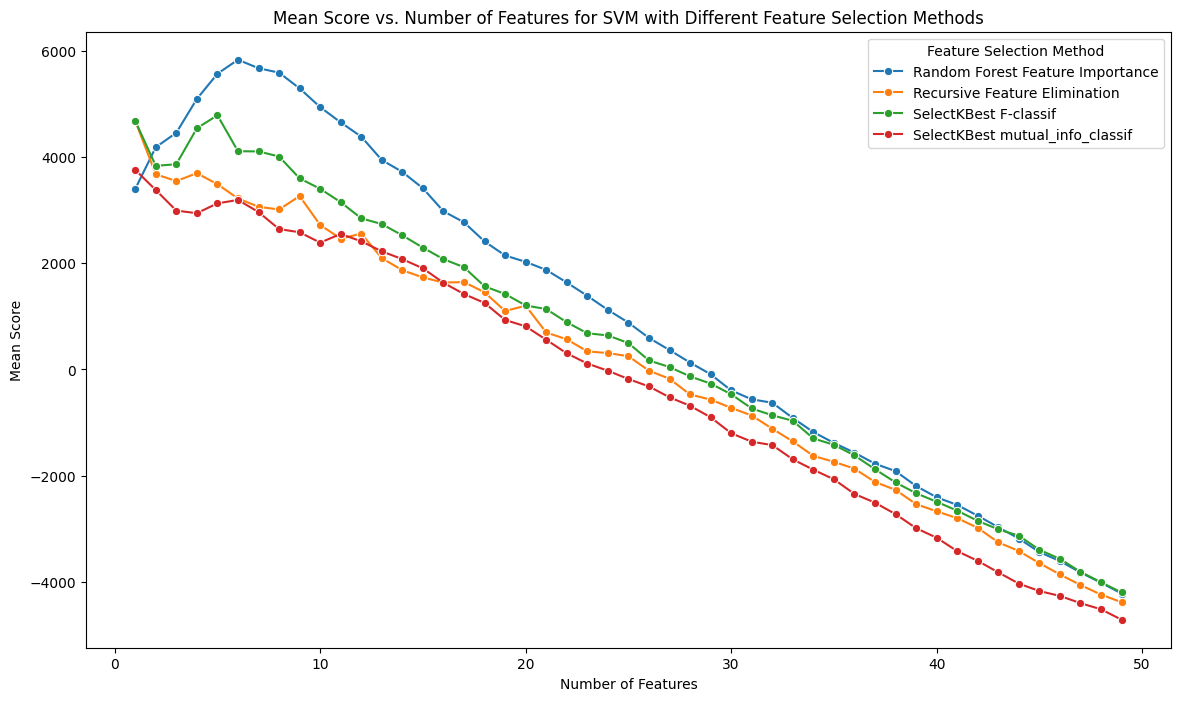

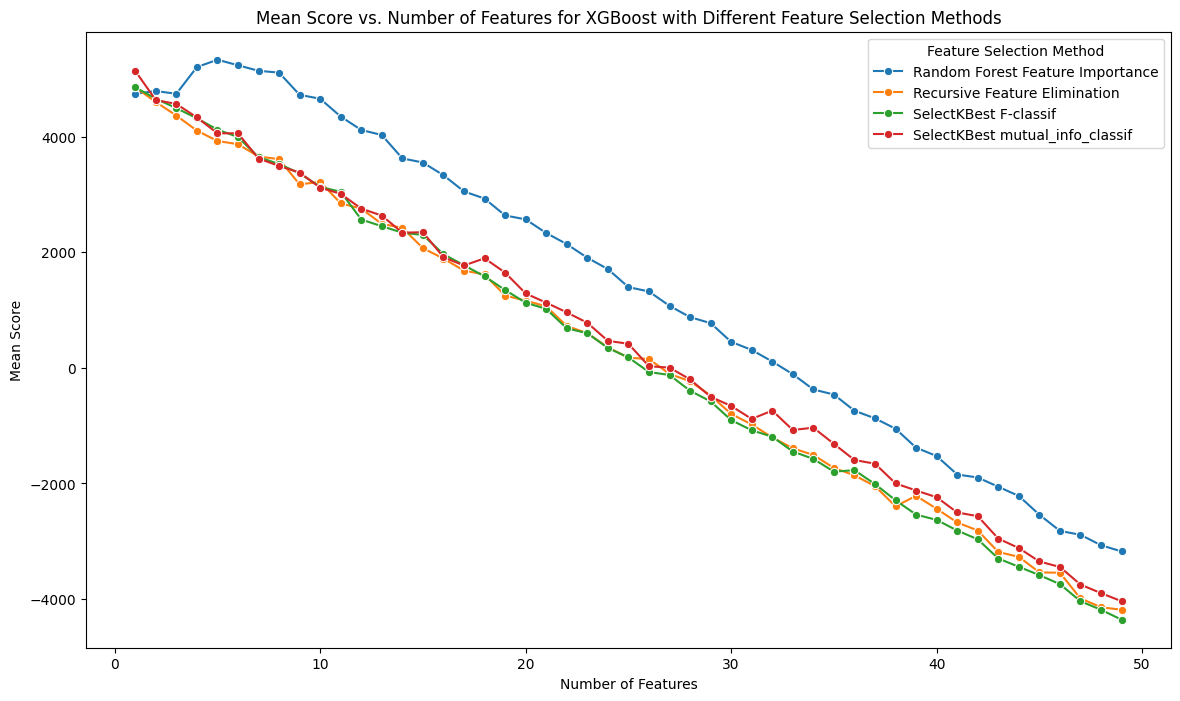

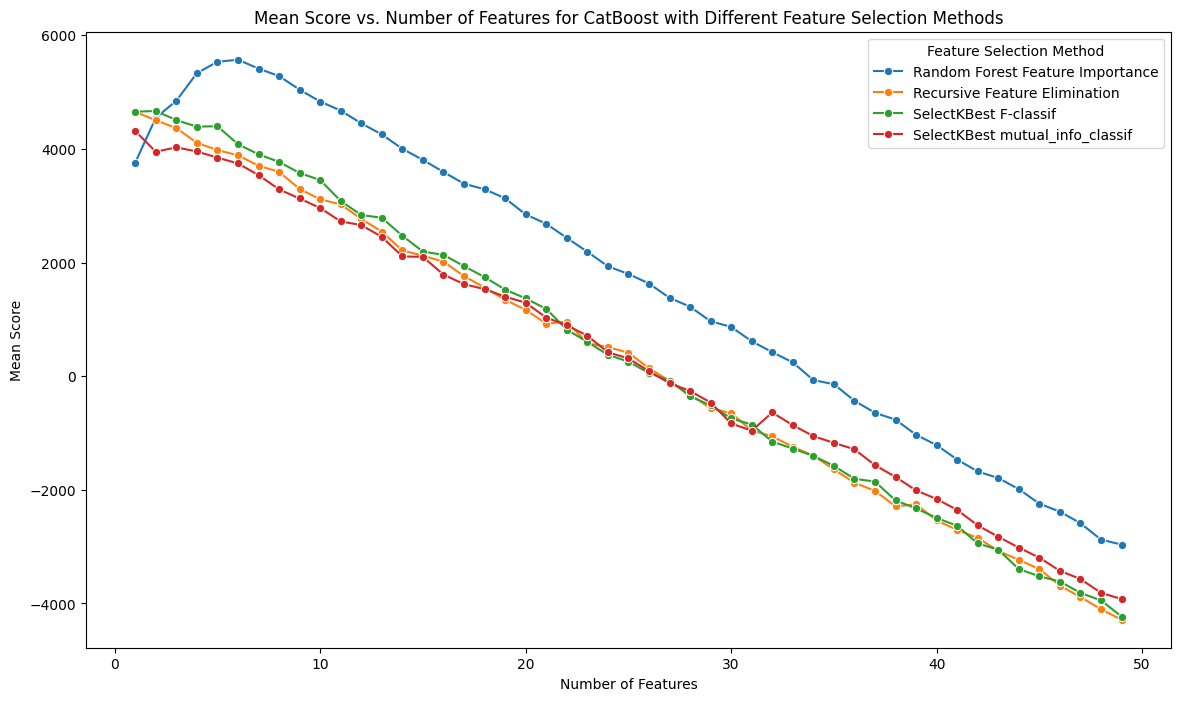

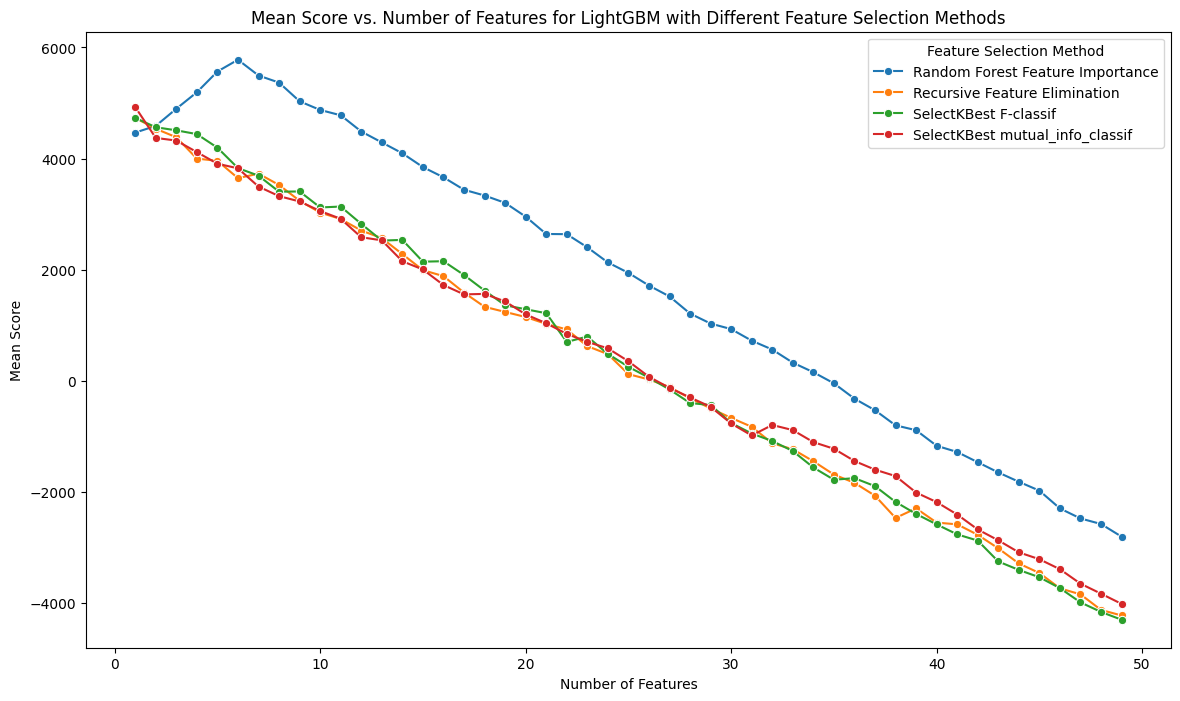

In [8]:
model_names = df['Model name'].unique()

for model in model_names:
    model_df = df[df['Model name'] == model]

    grouped_df = model_df.groupby(['Feature Selection Method', 'No Features']).agg({
        'Mean Score': ['mean', 'std']
    }).reset_index()

    grouped_df.columns = ['Feature Selection Method', 'No Features', 'Mean Score', 'Std Score']

    plt.figure(figsize=(14, 8))

    sns.lineplot(
        data=grouped_df,
        x="No Features",
        y="Mean Score",
        hue="Feature Selection Method",
        marker="o"
    )

    plt.title(f"Mean Score vs. Number of Features for {model} with Different Feature Selection Methods")
    plt.xlabel("Number of Features")
    plt.ylabel("Mean Score")
    plt.legend(title="Feature Selection Method")

    plt.show()

In [ ]:
filtered = df.loc[(exploded_df['No Features'] >= 4) & (exploded_df['No Features'] <= 6), :]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for model_name in ['Random Forest', 'SVM']:
    filtered_model = filtered.loc[filtered['Model name'] == model_name, :]
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='No Features', y='Score', hue='Feature Selection Method', data=filtered_model)
    plt.title(f'Grouped Box Plot of Scores by Number of Features and Feature Selection Method for model: {model_name}')
    plt.xlabel('Number of Features')
    plt.ylabel('Score')
    plt.savefig(f'{model_name}.png')
    plt.show()

In [ ]:
filtered = df.loc[(exploded_df['No Features'] >= 1) & (exploded_df['No Features'] <= 10), :]

In [ ]:
model_names = filtered['Model name'].unique()

for model in model_names:
    model_df = filtered[exploded_df['Model name'] == model]

    grouped_df = model_df.groupby(['Feature Selection Method', 'No Features']).agg({
        'Mean_Score': ['mean', 'std']
    }).reset_index()

    grouped_df.columns = ['Feature Selection Method', 'No Features', 'Mean Score', 'Std Score']

    plt.figure(figsize=(14, 8))

    sns.lineplot(
        data=grouped_df,
        x="No Features",
        y="Mean Score",
        hue="Feature Selection Method",
        marker="o"
    )

    plt.title(f"Mean Score vs. Number of Features for {model} with Different Feature Selection Methods")
    plt.xlabel("Number of Features")
    plt.ylabel("Mean Score")
    plt.legend(title="Feature Selection Method")
    if model == 'Random Forest':
        break
    plt.show()